In [1]:
import pandas as pd 

data = pd.read_pickle('CapsulePriceData.pkl')

In [2]:
''' This loop removes price values for the days before the capsule went on sale.
    Now the data represents the value of sticker capsules from the day it went on sale
    until 05/16/2021.
'''
for row in range(data.shape[0]):
    for i in range(6): # Running one for loop missed many 1.x values for some reason, but adding additional loops seems to have fixed it ???
        for price in data.loc[row, 'PriceList']:
            if price > 0.4 and data.loc[row, 'PriceList'].index(price) < 30:
                data.loc[row, 'PriceList'].remove(price) # Remove the price value
                data.loc[row, 'DateList'].pop() # Remove one day from the day list

In [3]:
def getGrowthRate(pricelist):
    ''' Calculating growth rate using the straight-line percent change method
        Growth rate = Absolute change / Original value
    '''
    grList = []
    for i in range(len(pricelist)):
        current = (abs(pricelist[i] - 0.28) / 0.28) * 100 # $0.28 is the market sell price to earn $0.25
        grList.append(current)
    return grList


''' Using the apply() method and a lambda function to add a computed column to the dataframe.
'''
data['GrowthRate'] = data.apply(lambda row: getGrowthRate(row['PriceList']), axis = 1)

In [4]:
def getAvgForDay(dataframe, column, day):
    ''' Returns the average value of a given column 
        element on a given day from DateList'''
    total = 0
    counter = 0
    for row in range(62):
        if len(dataframe.loc[row, column]) <= day:
            counter += 0
        else:
            total += dataframe.loc[row, column][day]
            counter += 1
    return total / counter
    

In [55]:
print(data.loc[2, 'PriceList'][1492])

2.453


In [90]:
AvgGrowth = getAvgGrowthList(data, 1492)

In [95]:
print(AvgGrowth[800])

779.4639489685962


In [5]:
def getAvgGrowthList(dataframe, days):
    ''' Returns a list of the average growth during the given
        amount of days '''
    avgGrowthRate = []
    for i in range(days):
        avgGrowthRate.append(getAvgForDay(dataframe, 'GrowthRate', i))
    return avgGrowthRate


In [6]:
def getAvgPrice(dataframe, days):
    avgPrice = []
    for i in range(days):
        avgPrice.append(getAvgForDay(dataframe, 'PriceList', i))
    return avgPrice

In [7]:
newData = {'Growth (%)': getAvgGrowthList(data, 200),
           'AvgPrice': getAvgPrice(data, 200),
           'Day': list(range(200))}
df = pd.DataFrame(newData)

In [8]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2020, 8, 8) # 200 MARKET days before 5/16/2021
end = datetime.datetime(2021, 5, 16)

SP500 = web.DataReader(['sp500'], 'fred', start, end)

In [9]:
SP500price = []
SP500growth = []
for day in SP500['sp500']:
    SP500price.append(day)
    current = (abs(day - SP500['sp500'][0]) / SP500['sp500'][0]) * 100
    SP500growth.append(current)


df['SP500Growth'] = SP500growth
df['SP500Price'] = SP500price
#cleanSP500 = pd.DataFrame(cleanSP500data)

In [17]:
print(bitcoin['Price'][199])

13,457.2


In [10]:
bitcoin = pd.read_csv("Bitcoin Historical Data (200 days).csv")

In [11]:
bitcoinprice = []
bitcoingrowth = []

bitcoinStartPrice = float(bitcoin['Price'][199].replace(',', ''))

for day in reversed(bitcoin['Price']):
    day = float(day.replace(',', ''))
    bitcoinprice.append(day)
    current = (abs(day - bitcoinStartPrice) / bitcoinStartPrice) * 100
    bitcoingrowth.append(current)

df['bitcoingrowth'] = bitcoingrowth
df['bitcoinprice'] = bitcoinprice
# Bitcoin between \n10/29/20 and 05/16/21

In [12]:
yr5data = {'Growth (%)': getAvgGrowthList(data, 1492),
           'AvgPrice': getAvgPrice(data, 1492),
           'Day': list(range(1492))}
yr5df = pd.DataFrame(yr5data)


In [217]:
print(len(getAvgGrowthList(data, 595))) # Why this?

595


In [13]:
start = datetime.datetime(2015, 8, 27) # 1492 MARKET days before 5/16/2021
end = datetime.datetime(2021, 5, 16)

yrSP500 = web.DataReader(['sp500'], 'fred', start, end)

In [14]:
yrSP500price = []
yrSP500growth = []
for day in yrSP500['sp500']:
    yrSP500price.append(day)
    current = (abs(day - yrSP500['sp500'][0]) / yrSP500['sp500'][0]) * 100
    yrSP500growth.append(current)

yr5df['SP500Growth'] = yrSP500growth
yr5df['SP500Price'] = yrSP500price

In [15]:
yrBitcoin = pd.read_csv("Bitcoin Historical Data 1492.csv")

In [16]:
yrbitcoinprice = []
yrbitcoingrowth = []

yrbitcoinStartPrice = float(yrBitcoin['Price'][1491].replace(',', ''))

for day in reversed(yrBitcoin['Price']):
    day = float(day.replace(',', ''))
    yrbitcoinprice.append(day)
    current = (abs(day - yrbitcoinStartPrice) / yrbitcoinStartPrice) * 100
    yrbitcoingrowth.append(current)

yr5df['bitcoingrowth'] = yrbitcoingrowth
yr5df['bitcoinprice'] = yrbitcoinprice

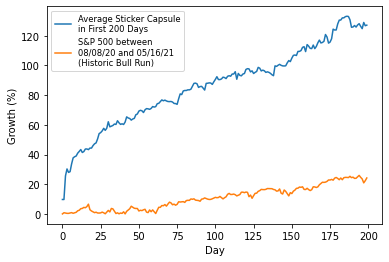

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.lineplot(x='Day', y='Growth (%)', data=df)
sns.lineplot(x='Day', y='SP500Growth', data=df) 
plt.legend(labels=['Average Sticker Capsule\nin First 200 Days',
                   'S&P 500 between \n08/08/20 and 05/16/21\n(Historic Bull Run)'], 
                   fontsize='small')

<AxesSubplot:xlabel='Day', ylabel='SP500Growth'>

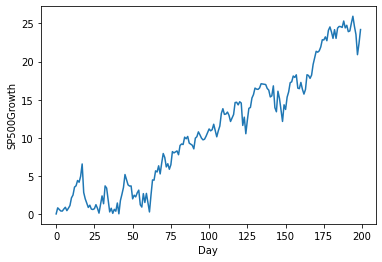

In [16]:
sns.lineplot(x='Day', y='SP500Growth', data=df)

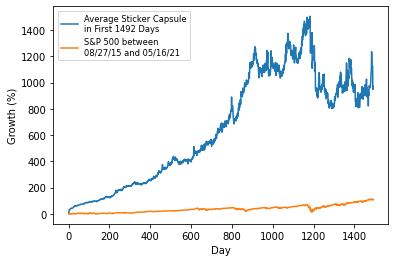

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Day', y='Growth (%)', data=yr5df)
sns.lineplot(x='Day', y='SP500Growth', data=yr5df) 
#sns.lineplot(x='Day', y='bitcoingrowth', data=yr5df)
plt.legend(labels=['Average Sticker Capsule\nin First 1492 Days',
                   'S&P 500 between \n08/27/15 and 05/16/21'], 
                   fontsize='small')

<AxesSubplot:xlabel='Index', ylabel='AvgPricePerCapsule'>

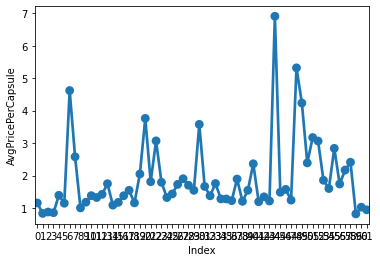

In [60]:
sns.pointplot(x='Index', y='AvgPricePerCapsule', data=data)

In [55]:
print(data.head)

<bound method NDFrame.head of                                              itemName  \
0      Autograph Capsule | Splyce | MLG Columbus 2016   
1   Autograph Capsule | Counter Logic Gaming | MLG...   
2   Autograph Capsule | Gambit Gaming | MLG Columb...   
3   Autograph Capsule | Flipsid3 Tactics | MLG Col...   
4   Autograph Capsule | Team Liquid | MLG Columbus...   
..                                                ...   
57            Katowice 2019 Legends Autograph Capsule   
58  Katowice 2019 Returning Challengers Autograph ...   
59    Berlin 2019 Minor Challengers Autograph Capsule   
60              Berlin 2019 Legends Autograph Capsule   
61  Berlin 2019 Returning Challengers Autograph Ca...   

                                             DateList  \
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   


In [57]:
'''
Get the average price to identify outliers
'''
avrgPrice = []
for elem in data['PriceList']:
    currAvg = sum(elem) / len(elem)
    avrgPrice.append(currAvg)


data['AvgPricePerCapsule'] = avrgPrice
data['Index'] = list(range(62))

In [52]:
print(data['AvgPricePerCapsule'])

0     1.156322
1     0.833793
2     0.877220
3     0.855631
4     1.391081
        ...   
57    2.168764
58    2.410584
59    0.817952
60    1.025443
61    0.943803
Name: AvgPricePerCapsule, Length: 62, dtype: float64


In [ ]:
'''TODO: examine each price graph individually to do extra data cleaning (find outliters etc), try to identify best performers and why'''